# Problem Set 2
##### Serena Flint

### Problem 1

Text(0, 0.5, '$x$')

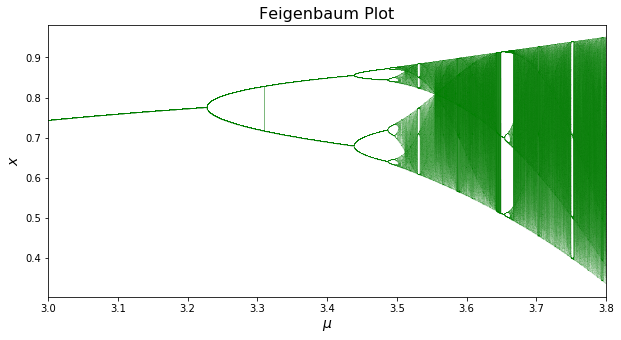

In [220]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

a = 2
x0 = 0.5

def f(mu, x): #original function
    return mu*x**a*(1-x**a)

fig, ax = plt.subplots(1, 1, figsize=(10, 5)) #designates a set of axes

mu = np.linspace(3.0, 3.8, 5000)
x = x0 * np.ones(5000)
n_it = 5000 #number of iterations
n_last = 50 #how many to plot

for i in range(n_it): #iterating up to desired limit
    x = f(mu, x)
    if i >= (n_it - n_last): #only plot desired last iterations!
        ax.plot(mu, x, ',g-', lw = 0.25, alpha = 0.05) #a lower alpha allows you to see the plot 
        
ax.set_xlim(3.0,3.8) #Range of x axis
ax.set_title("Feigenbaum Plot", fontsize = 16)
ax.set_xlabel(f"$\mu$", fontsize = 14)
ax.set_ylabel(f"$x$", fontsize = 14)


<ul>
    <li> The range of $\mu$ where the feigenbaum plot appears to follow period doubling rather than chaos is on the interval [3.00, $\approx$ 3.50] </li>
    <li> It appears that there are period 3 orbits at $\mu \approx 3.65$ </li>
</ul>
    

### Problem 2

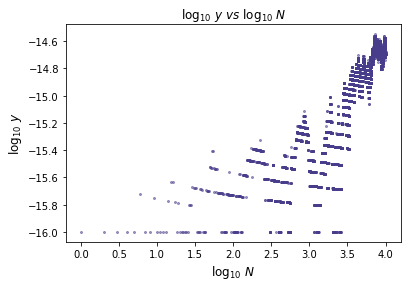

In [261]:
def sum_up(N): #sums the array from lowest to highest
    a = 0.0
    for i in (N):
        a += (1./i);
    return a
    
def sum_down(N): #sums to array from highest to lowest
    b = 0.0
    
    N_sort = np.sort(N)
    rev_N = N_sort[::-1] #reverses the array to decreasing order
    
    for j in (rev_N):
        b += (1./j);
    return b

def y_val(n):
    return np.abs(((sum_up(n))-(sum_down(n)))/((sum_up(n))+(sum_down(n))))

X = 10000
N = np.linspace(1,X, X, dtype = int) #x values
y = np.zeros(X) #array of y values

for k in (N):
    test = np.linspace(1, N[k-1], N[k-1]) #creates an array of N[k-1] dimension
    y[k-1] = y_val(test) #adds the calculated y value to the y array
      
plt.title("$\log_{10}\ y \\ vs \\ \log_{10}\ N$")
plt.ylabel("$\log_{10}\  y$", fontsize = 12)
plt.xlabel("$\log_{10}\ N$", fontsize = 12)

plt.plot(np.log10(N), np.log10(y+1e-16),'o',color='darkslateblue', ms = 2, alpha = 0.5)
        

$S_{down}$ is generally more precise because in this case we are taking the inverse of each $N$, and therefore effectively adding each number by increasing value. This results in less rounding errors due to how the values of floats are designated in binary.

I found an interesting article by Nicholas J. Highgam called, "<i>The Accuracy of Floating Point Summation</i>," that appears to have done a mathematical analysis of this concept and various summation techniques. This article can be found <a href="https://pdfs.semanticscholar.org/2b64/abd41d819f882f233968e3d0c552778c112a.pdf?_ga=2.121570444.502401600.1549271171-1633811330.1549271171">here</a>.